# Index of deprivation (health) by borough

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## London boroughs

In [4]:
map_df=gpd.read_file('./data/statistical-gis-boundaries-london//ESRI/London_Borough_Excluding_MHW.shp')
map_df.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


<Axes: >

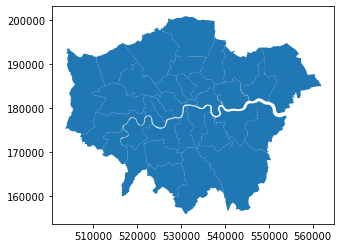

In [5]:
map_df.plot()

## Index of deprivation

In [6]:
# load iod
df=pd.read_csv('./data/IoD/IoD2019_Scores.csv',encoding='cp1252')
df.head()

,ï»¿LSOA code (2011),LSOA name (2011),Local Authority District code (2019),Local Authority District name (2019),Index of Multiple Deprivation (IMD) Score,Income Score (rate),Employment Score (rate),"Education, Skills and Training Score",Health Deprivation and Disability Score,Crime Score,Barriers to Housing and Services Score,Living Environment Score,Income Deprivation Affecting Children Index (IDACI) Score (rate),Income Deprivation Affecting Older People (IDAOPI) Score (rate),Children and Young People Sub-domain Score,Adult Skills Sub-domain Score,Geographical Barriers Sub-domain Score,Wider Barriers Sub-domain Score,Indoors Sub-domain Score,Outdoors Sub-domain Score
0,E01000001,City of London 001A,E09000001,City of London,6.208,0.007,0.010,0.024,-1.654,-2.012,29.472,31.873,0.006,0.012,-2.107,0.032,-0.430,3.587,0.006,1.503
1,E01000002,City of London 001B,E09000001,City of London,5.143,0.034,0.027,0.063,-1.115,-2.343,24.412,23.084,0.037,0.030,-1.907,0.034,-1.060,3.231,-0.410,1.196
2,E01000003,City of London 001C,E09000001,City of London,19.402,0.086,0.086,5.804,-0.102,-1.032,40.103,40.535,0.052,0.128,-0.292,0.142,-0.691,5.173,-0.054,2.207
3,E01000005,City of London 001E,E09000001,City of London,28.652,0.211,0.136,22.260,-0.121,-1.317,39.900,28.979,0.209,0.322,0.338,0.321,-1.167,5.361,-0.604,1.769
4,E01000006,Barking and Dagenham 016A,E09000002,Barking and Dagenham,19.837,0.117,0.059,14.798,-0.359,-0.147,45.171,26.888,0.155,0.162,-0.366,0.325,-0.400,5.590,0.110,0.969


In [7]:
# clean variable names
df.columns=df.columns.str.lower().str.replace(' ','_')
#df.head()

In [13]:
# select main variables
df=df[['local_authority_district_code_(2019)','local_authority_district_name_(2019)',
       'index_of_multiple_deprivation_(imd)_score', 'income_score_(rate)',
       'health_deprivation_and_disability_score']]

#df.head()


In [14]:
# rename variables
dformap=df.rename(index=str,columns={
     'local_authority_district_code_(2019)' : 'borough_code', 
     'local_authority_district_name_(2019)' : 'borough_name',
     'index_of_multiple_deprivation_(imd)_score' : 'iod', 
     'income_score_(rate)': 'income', 
     'health_deprivation_and_disability_score': 'health_deprivation'})
dformap.head()

,borough_code,borough_name,iod,income,health_deprivation
0,E09000001,City of London,6.208,0.007,-1.654
1,E09000001,City of London,5.143,0.034,-1.115
2,E09000001,City of London,19.402,0.086,-0.102
3,E09000001,City of London,28.652,0.211,-0.121
4,E09000002,Barking and Dagenham,19.837,0.117,-0.359


## Overlay iod score on London map

In [15]:
# merge iod with map of boroughs
merged=map_df.set_index('NAME').join(dformap.set_index('borough_name'))
merged.head()

,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,borough_code,iod,income,health_deprivation
Barking and Dagenham,E09000002,3779.934,169.15,F,None,None,"MULTIPOLYGON (((543905.400 183199.100, 543905....",E09000002,19.837,0.117,-0.359
Barking and Dagenham,E09000002,3779.934,169.15,F,None,None,"MULTIPOLYGON (((543905.400 183199.100, 543905....",E09000002,31.576,0.207,-0.027
Barking and Dagenham,E09000002,3779.934,169.15,F,None,None,"MULTIPOLYGON (((543905.400 183199.100, 543905....",E09000002,37.596,0.265,0.250
Barking and Dagenham,E09000002,3779.934,169.15,F,None,None,"MULTIPOLYGON (((543905.400 183199.100, 543905....",E09000002,32.844,0.187,0.454
Barking and Dagenham,E09000002,3779.934,169.15,F,None,None,"MULTIPOLYGON (((543905.400 183199.100, 543905....",E09000002,32.437,0.169,-0.002


Text(0.5, 1.0, 'Health deprivation')

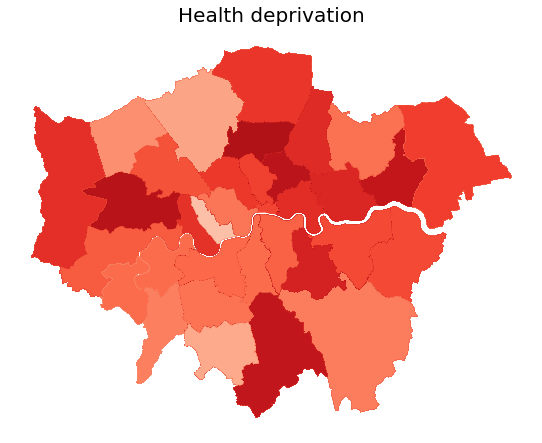

In [16]:
# choose component of IoD to display on map
comp ='health_deprivation'

vmin,vmax=merged[comp].min(),merged[comp].max()
fig,ax=plt.subplots(1,figsize=(12,7.5))
merged.plot(column=comp,cmap='Reds',ax=ax)
ax.axis('off')
plt.title('Health deprivation',{'fontsize': '20','fontweight' :'100'})
